In [1]:
# Import required libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to read images and labels from a dataset
def read_images(data_path, img_size=(200, 200)):
    """
    Reads images from the dataset folder and returns them along with labels.
    Each subfolder in 'data_path' represents a class (e.g., a person's name).
    """
    images = []
    labels = []
    label_map = {}
    current_label = 0

    for dir_name in sorted(os.listdir(data_path)):
        dir_path = os.path.join(data_path, dir_name)
        if not os.path.isdir(dir_path):
            continue

        label_map[current_label] = dir_name
        for file_name in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file_name)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, img_size)
                images.append(img_resized)
                labels.append(current_label)
        current_label += 1

    return np.asarray(images), np.asarray(labels), label_map

In [3]:
# Function to compute confidence level
def compute_confidence_level(confidence, threshold=5000):
    """
    Computes a normalized confidence level as a percentage.
    - Confidence closer to 0 means higher similarity.
    - `threshold` determines the maximum distance for 0% confidence.
    """
    normalized_confidence = max(0, min(1, confidence / threshold))
    confidence_level = (1 - normalized_confidence) * 100
    return confidence_level

In [4]:
# Function to test the model and plot confidence levels
def test_model_with_images(fisherface, label_map, test_data_path, img_size=(200, 200), threshold=5000):
    """
    Tests the model with images from a specified folder and plots the confidence levels.
    """
    confidence_levels = []
    predictions = []
    test_images = []

    for file_name in sorted(os.listdir(test_data_path)):
        file_path = os.path.join(test_data_path, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, img_size)
            label, confidence = fisherface.predict(img_resized)
            confidence_level = compute_confidence_level(confidence, threshold)
            confidence_levels.append(confidence_level)
            predictions.append(label_map[label] if label in label_map else "Unknown")
            test_images.append(img_resized)

    # Print results
    for i, confidence in enumerate(confidence_levels):
        print(f"Test Image {i + 1}: Predicted Label = {predictions[i]}, Confidence Level = {confidence:.2f}%")

    # Plot confidence levels
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(confidence_levels) + 1), confidence_levels, color='skyblue')
    plt.xticks(range(1, len(confidence_levels) + 1))
    plt.title("Confidence Levels for Test Images")
    plt.xlabel("Test Image #")
    plt.ylabel("Confidence Level (%)")
    plt.ylim(0, 100)
    plt.show()

Step 1: Training the Fisherface Model


NameError: name 'confidence_levels' is not defined

<Figure size 1000x600 with 0 Axes>

Step 1: Training the Fisherface Model
Fisherface model trained successfully.

Step 2: Testing the Model and Visualizing Confidence Levels
Align your face and press 's' to capture a test image.
Capture test image 1/5
Test image captured.
Predicted Label: ean
Confidence: 8239.33 (raw), Confidence Level: 0.00%
Get ready for the next capture...
Capture test image 2/5
Test image captured.
Predicted Label: ean
Confidence: 6424.37 (raw), Confidence Level: 0.00%
Get ready for the next capture...
Capture test image 3/5
Test image captured.
Predicted Label: ean
Confidence: 5668.39 (raw), Confidence Level: 0.00%
Get ready for the next capture...
Capture test image 4/5
Test image captured.
Predicted Label: ean
Confidence: 4941.68 (raw), Confidence Level: 1.17%
Get ready for the next capture...
Capture test image 5/5
Test image captured.
Predicted Label: ean
Confidence: 504.82 (raw), Confidence Level: 89.90%


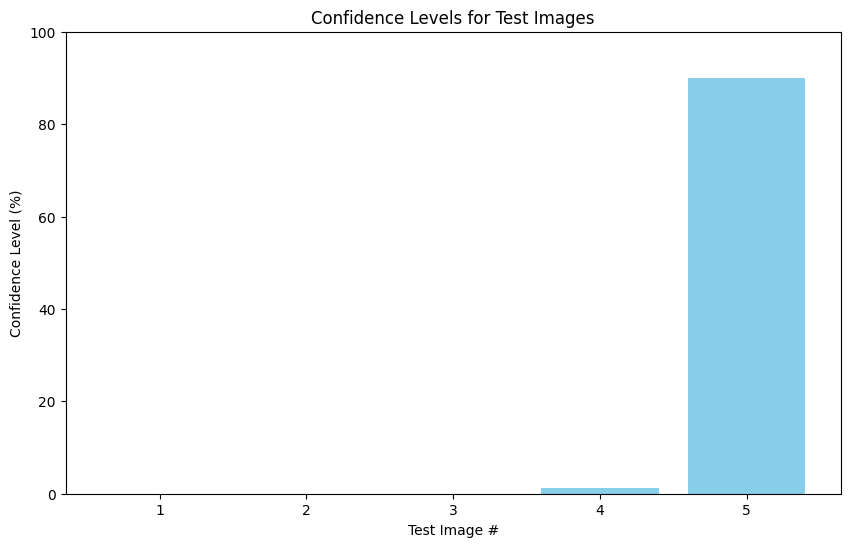

Fisherface model trained successfully.

Step 2: Testing the Model with a Live Capture
Align your face and press 's' to capture a test image.
Capture test image 1/5


KeyboardInterrupt: 

: 

In [20]:
# Main execution
data_path = "dataset"  # Path to the training dataset
test_data_path = "test_images"  # Path to the test dataset
img_size = (200, 200)

# Step 1: Read saved images and train the Fisherface model
print("Step 1: Training the Fisherface Model")
images, labels, label_map = read_images(data_path, img_size)

if len(np.unique(labels)) < 2:
    print("Error: At least two classes are needed to train the model. Add more images to the dataset.")
else:
    fisherface = cv2.face.FisherFaceRecognizer_create()
    fisherface.train(images, labels)
    print("Fisherface model trained successfully.")

    # Step 2: Test the model with saved test images and visualize results
    print("\nStep 2: Testing the Model with Saved Test Images")
    test_model_with_images(fisherface, label_map, test_data_path, img_size, threshold=5000)